#  English Premier League Market Value Prediction

## Data Loading

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('team_dataset.csv')

## Exploratory Data Analysis

In [4]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [5]:
df.shape

(461, 17)

In [ ]:
df.size

7837

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.00,24.0,27.0,30.0,38.0
position_cat,461.0,2.180043,1.000061,1.00,1.0,2.0,3.0,4.0
market_value,461.0,11.012039,12.257403,0.05,3.0,7.0,15.0,75.0
page_views,461.0,763.776573,931.805757,3.00,220.0,460.0,896.0,7664.0
fpl_value,461.0,5.447939,1.346695,4.00,4.5,5.0,5.5,12.5
fpl_points,461.0,57.314534,53.113811,0.00,5.0,51.0,94.0,264.0
region,460.0,1.993478,0.957689,1.00,1.0,2.0,2.0,4.0
new_foreign,461.0,0.034707,0.183236,0.00,0.0,0.0,0.0,1.0
age_cat,461.0,3.206074,1.279795,1.00,2.0,3.0,4.0,6.0
club_id,461.0,10.334056,5.726475,1.00,6.0,10.0,15.0,20.0


In [ ]:
df.isnull().sum()

,0
name,0
club,0
age,0
position,0
position_cat,0
market_value,0
page_views,0
fpl_value,0
fpl_sel,0
fpl_points,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
name,461
club,20
age,22
position,13
position_cat,4
market_value,48
page_views,389
fpl_value,17
fpl_sel,113
fpl_points,153


In [ ]:
df['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [ ]:
df['club'].value_counts()

,count
club,
Arsenal,28
Huddersfield,28
Everton,28
Liverpool,27
Swansea,25
Manchester+United,25
Bournemouth,24
Leicester+City,24
Watford,24


In [ ]:
df['new_foreign'].value_counts()

,count
new_foreign,
0,445
1,16


In [ ]:
df['new_signing'].value_counts()

,count
new_signing,
0,394
1,67


In [ ]:
df.groupby('new_foreign')['market_value'].mean()

,market_value
new_foreign,
0,10.784382
1,17.343750


In [ ]:
df.groupby('new_signing')['market_value'].mean()

,market_value
new_signing,
0,10.348985
1,14.911194


## Data Visualization

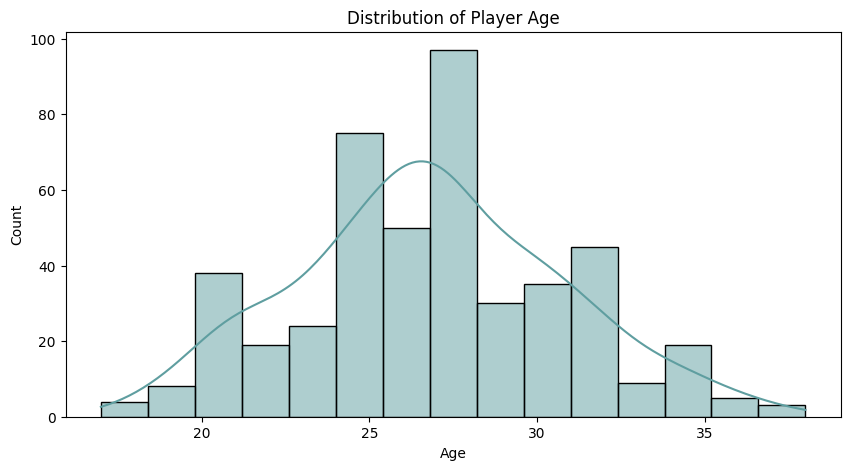

In [ ]:
# Distribution of Player Age

plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=15, kde=True, color="cadetblue")
plt.title("Distribution of Player Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

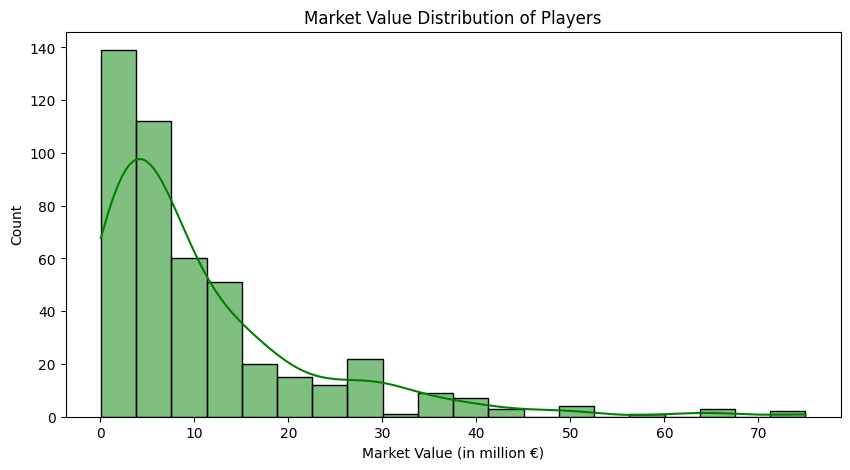

In [ ]:
# Market Value Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df['market_value'], bins=20, kde=True, color="green")
plt.title("Market Value Distribution of Players")
plt.xlabel("Market Value (in million €)")
plt.ylabel("Count")
plt.show()

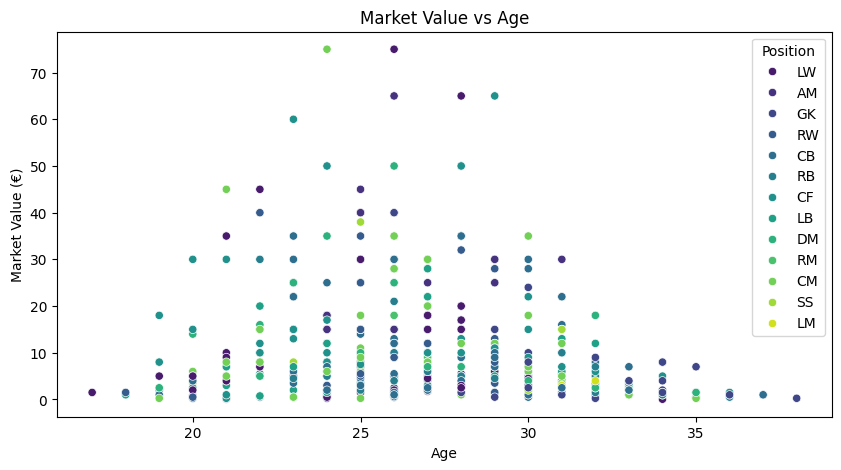

In [ ]:
# Market Value vs. Age (Scatter Plot)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['age'], y=df['market_value'], hue=df['position'], palette='viridis')
plt.title("Market Value vs Age")
plt.xlabel("Age")
plt.ylabel("Market Value (€)")
plt.legend(title="Position")
plt.show()

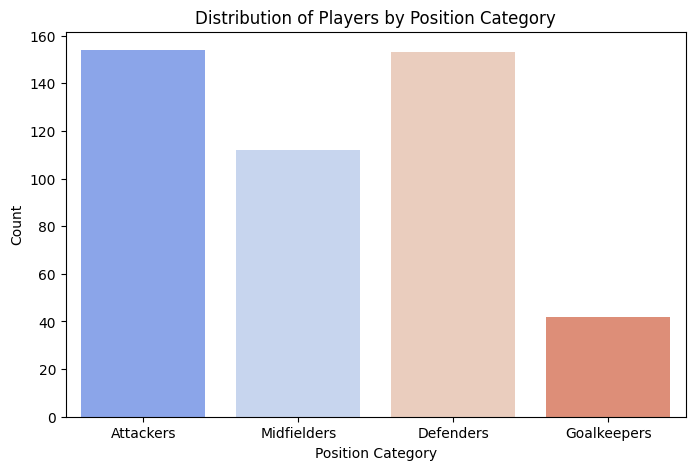

In [ ]:
# Position Category Distribution (Bar Plot)

plt.figure(figsize=(8, 5))
sns.countplot(x='position_cat', data=df, palette="coolwarm")
plt.title("Distribution of Players by Position Category")
plt.xlabel("Position Category")
plt.ylabel("Count")
plt.xticks([0, 1, 2, 3], ["Attackers", "Midfielders", "Defenders", "Goalkeepers"])
plt.show()

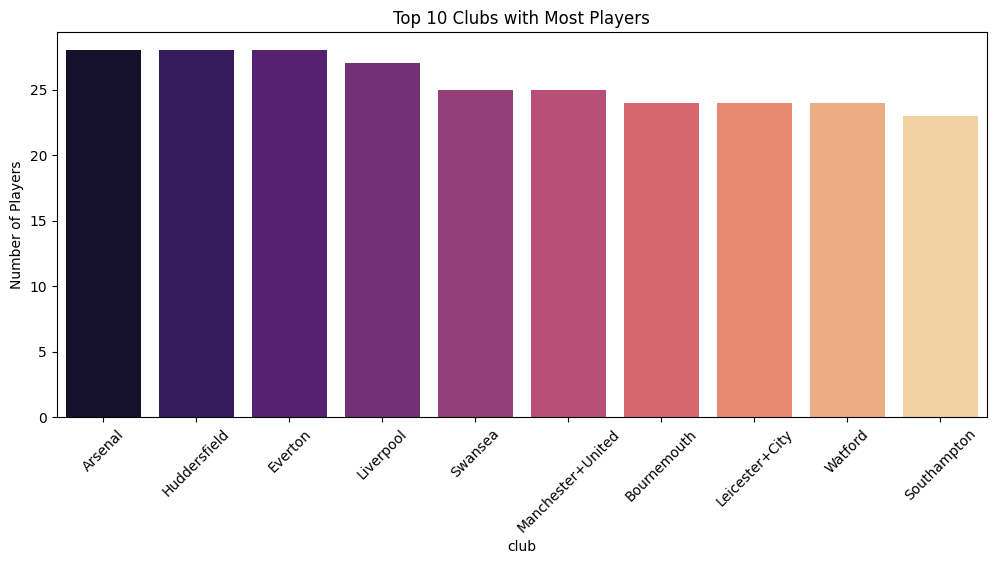

In [ ]:
# Top 10 Clubs with Most Players (Bar Plot)

plt.figure(figsize=(12, 5))
top_clubs = df['club'].value_counts().nlargest(10)
sns.barplot(x=top_clubs.index, y=top_clubs.values, palette="magma")
plt.title("Top 10 Clubs with Most Players")
plt.xticks(rotation=45)
plt.ylabel("Number of Players")
plt.show()

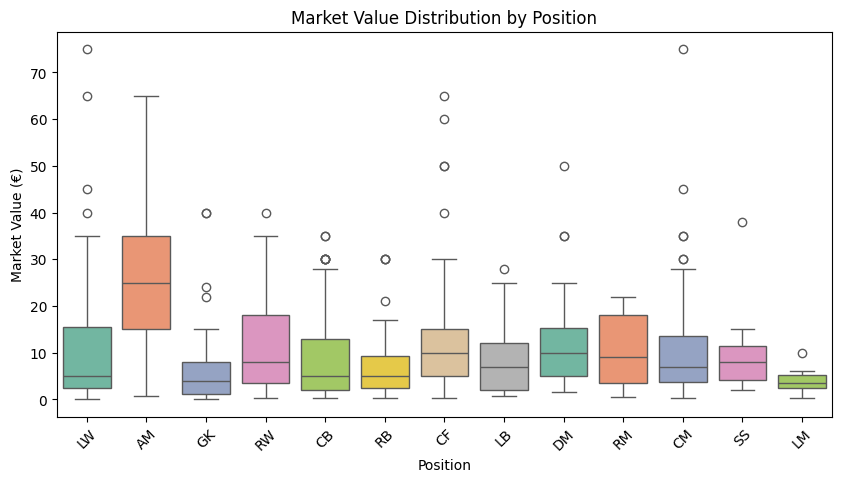

In [ ]:
# Average Market Value by Position (Box Plot)

plt.figure(figsize=(10, 5))
sns.boxplot(x='position', y='market_value', data=df, palette="Set2")
plt.title("Market Value Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Market Value (€)")
plt.xticks(rotation=45)
plt.show()

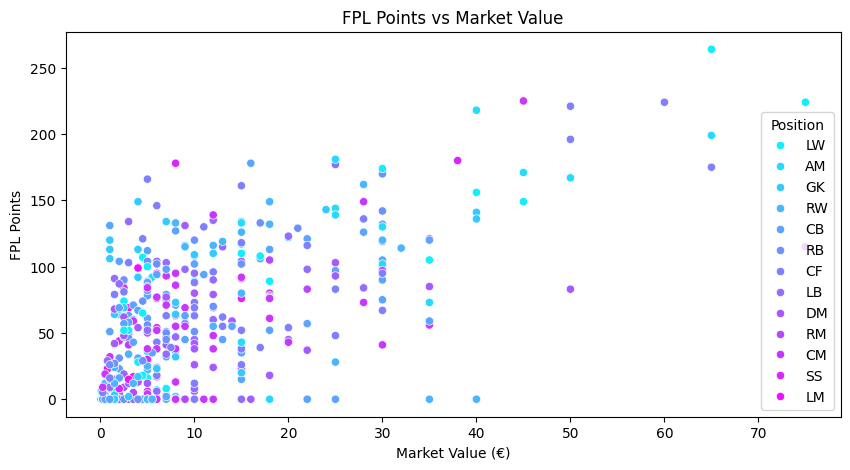

In [ ]:
# Fantasy Premier League (FPL) Points vs Market Value (Scatter Plot)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['market_value'], y=df['fpl_points'], hue=df['position'], palette="cool")
plt.title("FPL Points vs Market Value")
plt.xlabel("Market Value (€)")
plt.ylabel("FPL Points")
plt.legend(title="Position")
plt.show()

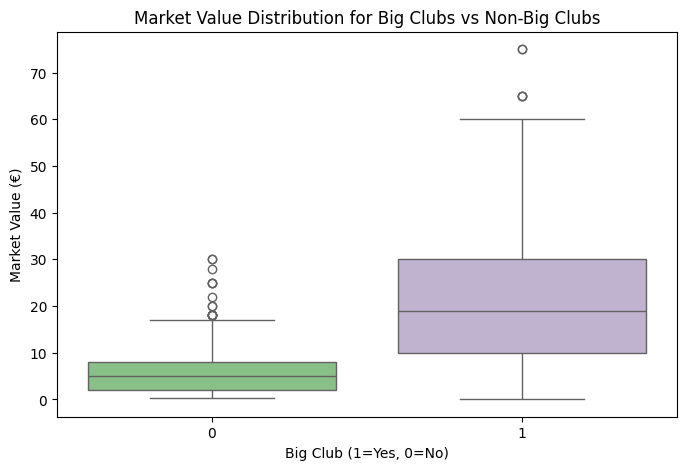

In [ ]:
#Big Clubs vs Market Value (Box Plot)

plt.figure(figsize=(8, 5))
sns.boxplot(x='big_club', y='market_value', data=df, palette="Accent")
plt.title("Market Value Distribution for Big Clubs vs Non-Big Clubs")
plt.xlabel("Big Club (1=Yes, 0=No)")
plt.ylabel("Market Value (€)")
plt.show()

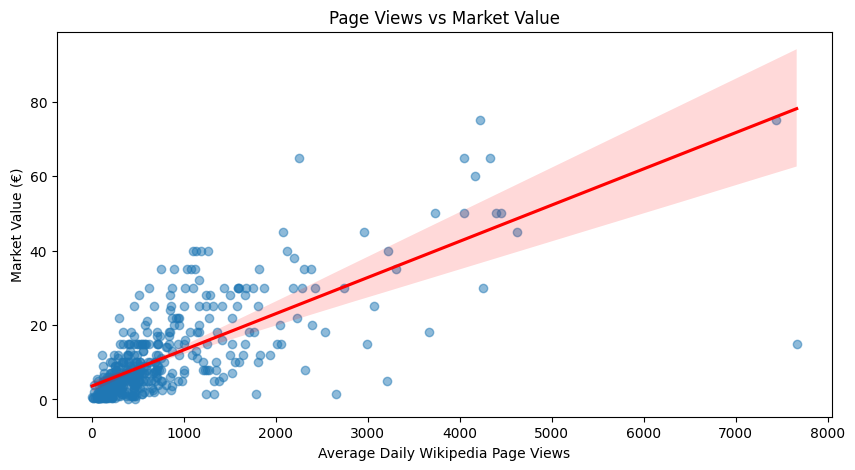

In [ ]:
# Page Views vs Market Value (Regression Plot)

plt.figure(figsize=(10, 5))
sns.regplot(x=df['page_views'], y=df['market_value'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Page Views vs Market Value")
plt.xlabel("Average Daily Wikipedia Page Views")
plt.ylabel("Market Value (€)")
plt.show()

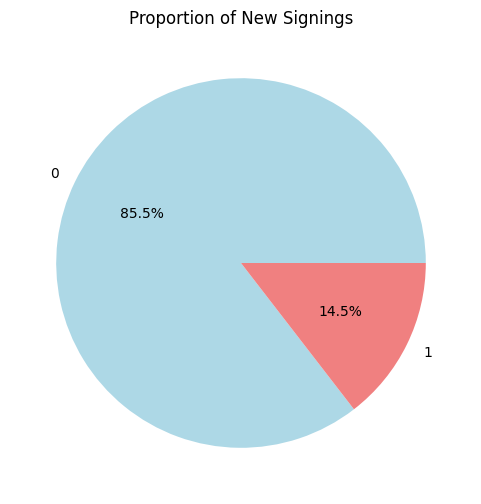

In [ ]:
# Proportion of New Signings (Pie Chart)

plt.figure(figsize=(6, 6))
df['new_signing'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Proportion of New Signings")
plt.ylabel("")
plt.show()

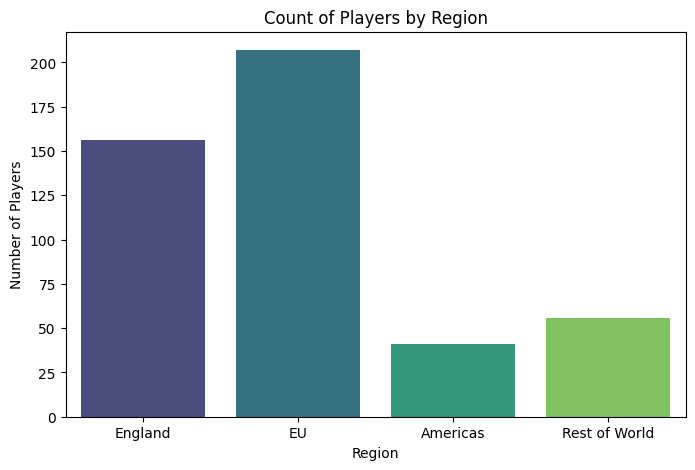

In [ ]:
# Count of Players by Region (Bar Plot)

plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df, palette="viridis")
plt.title("Count of Players by Region")
plt.xlabel("Region")
plt.ylabel("Number of Players")
plt.xticks([0, 1, 2, 3], ["England", "EU", "Americas", "Rest of World"])
plt.show()

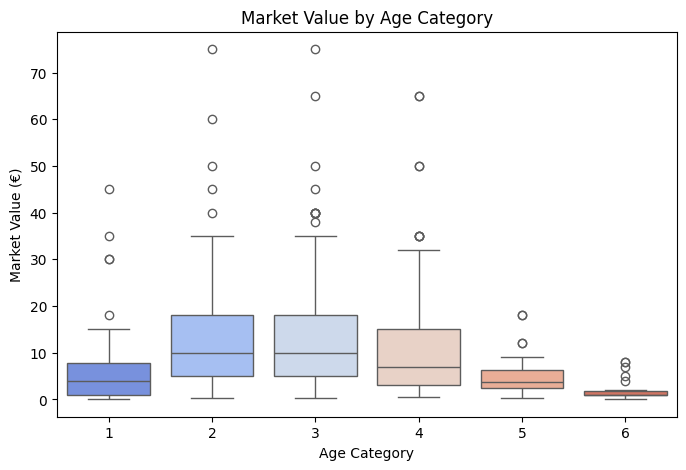

In [ ]:
# Market Value by Age Category (Box Plot)

plt.figure(figsize=(8, 5))
sns.boxplot(x='age_cat', y='market_value', data=df, palette="coolwarm")
plt.title("Market Value by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Market Value (€)")
plt.show()

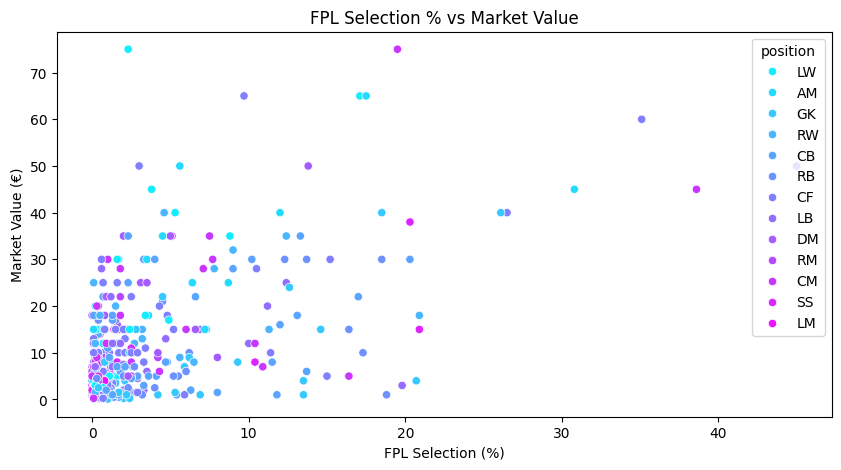

In [ ]:
# FPL Selection Percentage vs Market Value (Scatter Plot)

df['fpl_sel'] = df['fpl_sel'].str.rstrip('%').astype('float')  # Convert FPL selection to numeric
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['fpl_sel'], y=df['market_value'], hue=df['position'], palette="cool")
plt.title("FPL Selection % vs Market Value")
plt.xlabel("FPL Selection (%)")
plt.ylabel("Market Value (€)")
plt.show()

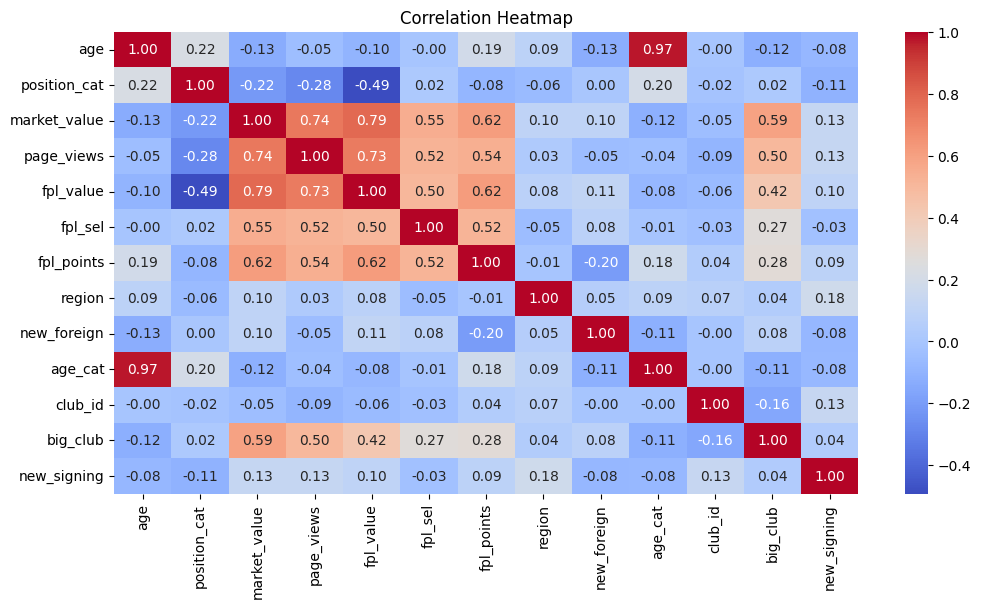

In [ ]:
# Correlation Heatmap

df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

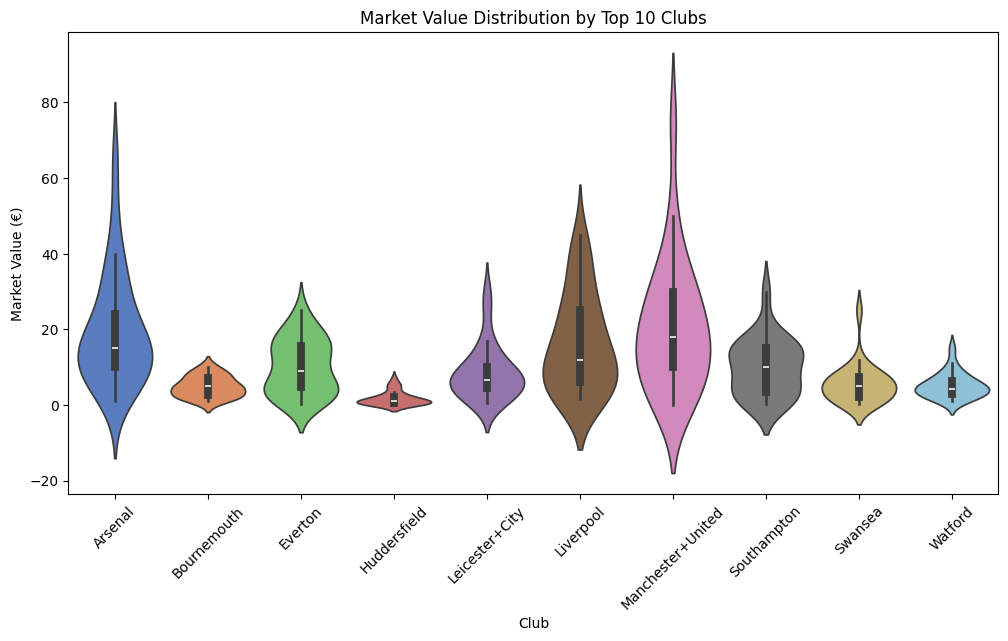

In [ ]:
# Distribution of Market Value by Club (Violin Plot)

top_10_clubs = df['club'].value_counts().index[:10]  # Get top 10 clubs
plt.figure(figsize=(12, 6))
sns.violinplot(x='club', y='market_value', data=df[df['club'].isin(top_10_clubs)], palette="muted")
plt.title("Market Value Distribution by Top 10 Clubs")
plt.xlabel("Club")
plt.ylabel("Market Value (€)")
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [30]:
# Dropping Age_cat as it is highly correlated

df.drop(columns=['age_cat'], inplace=True)

In [31]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [32]:
X = df.drop(columns=['market_value'])
y = df['market_value']

In [33]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [10]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [11]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [12]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.7261832631325689,
 0.8048173189163208,
 0.805647809854246,
 0.7417670817483064,
 0.8426695640414413,
 0.7401458555634012,
 0.5265881010013965,
 0.6126840251531,
 0.5355968787292937]

## Model Evaluation

In [13]:
model_scores = {}
model_names = ['Ride_reg', 'XGBoost', 'Random_forest', 'Ada_boost', 'Grad_boost', 'Bagging', 'Decision_tree', 'Svr', 'Knn']  # Define model names

for model_name, model in zip(model_names, model_li):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    model_scores[model_name] = {'R2 Score': cv_scores.mean(), 'MAE': mae}
for model, scores in model_scores.items():
    print(f"{model}: R² Score = {scores['R2 Score']:.4f}, MAE = {scores['MAE']:.4f}")

Ride_reg: R² Score = 0.7202, MAE = 4.2802
XGBoost: R² Score = 0.7776, MAE = 3.5704
Random_forest: R² Score = 0.7876, MAE = 3.5843
Ada_boost: R² Score = 0.7572, MAE = 4.2506
Grad_boost: R² Score = 0.8285, MAE = 3.2030
Bagging: R² Score = 0.7749, MAE = 4.0376
Decision_tree: R² Score = 0.4902, MAE = 5.1075
Svr: R² Score = 0.5606, MAE = 5.0449
Knn: R² Score = 0.4791, MAE = 5.6301


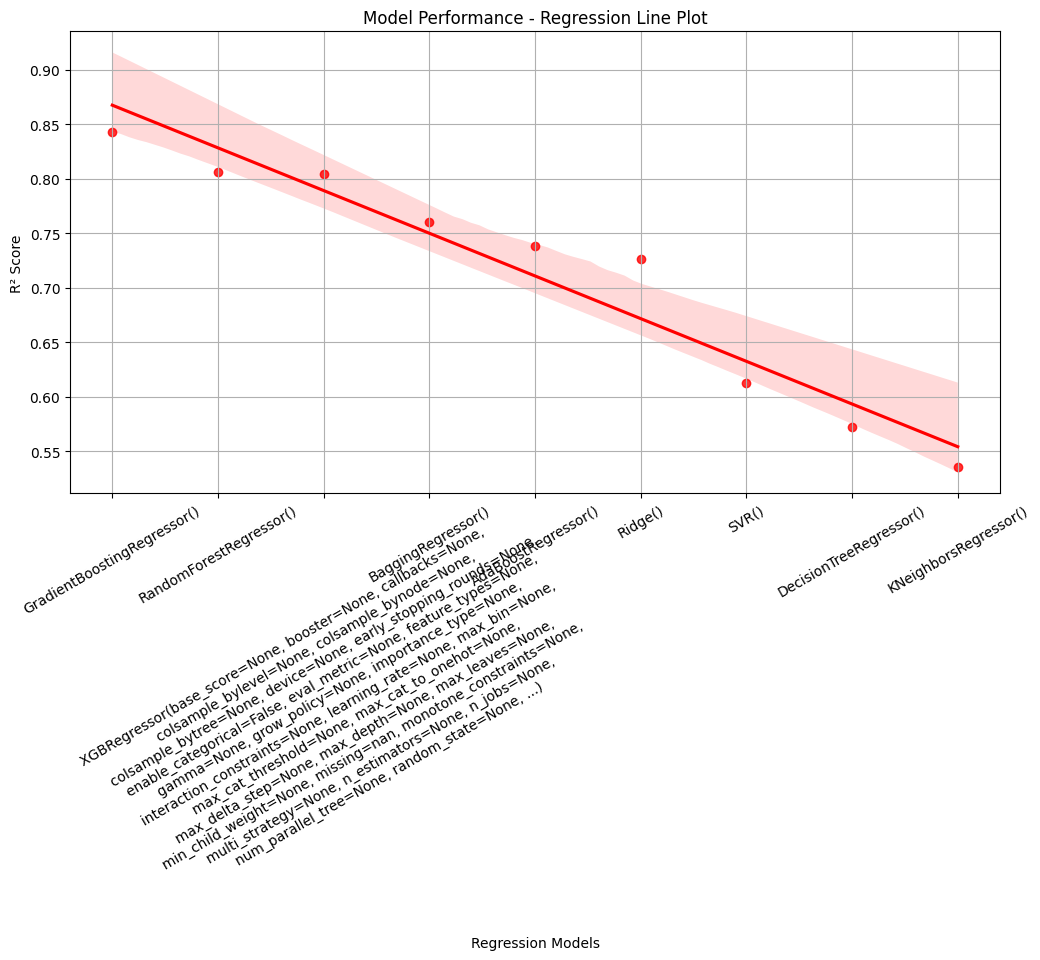

In [14]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

df_scores = pd.DataFrame({'Model': model_li, 'R2 Score': Score})
df_scores = df_scores.sort_values(by='R2 Score', ascending=False)

# Regression line

plt.figure(figsize=(12, 6))
sns.regplot(x=list(range(len(df_scores))), y=df_scores['R2 Score'],
            scatter=True, marker="o", fit_reg=True, color="red")

plt.xticks(range(len(df_scores)), df_scores['Model'], rotation=30)
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Model Performance - Regression Line Plot")
plt.grid(True)
plt.show()